In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

# ['name', 'birth_year', 'birth_date', 'birthplace', 'race_ethnicity', 'religion', 'sexual_orientation', 'year_edition', 'category', 'movie']

In [136]:
df = pd.read_csv("world_ampas_oscar_winner_demographics.csv")

In [137]:
df.head()

,name,birth_year,birth_date,birthplace,race_ethnicity,religion,sexual_orientation,year_edition,category,movie
0,Marie Dressler,1868,1868-11-02,"Cobourg, Ontario, Canada",White,NaN,Straight,1931,Best Actress,Min and Bill
1,George Arliss,1868,1868-04-10,"London, England",White,NaN,Straight,1930,Best Actor,Desraeli
2,Edmund Gwenn,1875,1875-09-26,"Vale of Glamorgan, Wales",White,NaN,Na,1948,Best Supporting Actor,Miracle on 34th Street
3,Charles Coburn,1877,1877-06-17,"Savannah, Ga",White,NaN,Straight,1944,Best Supporting Actor,The More the Merrier
4,Lionel Barrymore,1878,1878-04-28,"Philadelphia, Pa",White,Roman Catholic,Straight,1931,Best Actor,A Free Soul


In [138]:
df.shape

(415, 10)

In [139]:
df_backup = df.copy()

In [140]:
# nulos por coluna

nulos_por_colunas = df.isnull().sum()
print(nulos_por_colunas)

name                    0
birth_year              0
birth_date              1
birthplace              0
race_ethnicity          0
religion              256
sexual_orientation      0
year_edition            0
category                0
movie                   0
dtype: int64


In [141]:
nulos_por_linhas = df.isnull().sum(axis=1)
print(nulos_por_linhas)

0      1
1      1
2      1
3      1
4      0
      ..
410    0
411    0
412    1
413    1
414    1
Length: 415, dtype: int64


In [142]:
# descrição dos dados

df.describe()

,birth_year,year_edition
count,415.000000,415.000000
mean,1928.848193,1972.867470
std,25.716376,24.057284
min,1868.000000,1927.000000
25%,1908.000000,1952.500000
50%,1928.000000,1973.000000
75%,1949.000000,1994.000000
max,1990.000000,2014.000000


In [143]:
# verificar as informações

df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                415 non-null    object
 1   birth_year          415 non-null    int64 
 2   birth_date          414 non-null    object
 3   birthplace          415 non-null    object
 4   race_ethnicity      415 non-null    object
 5   religion            159 non-null    object
 6   sexual_orientation  415 non-null    object
 7   year_edition        415 non-null    int64 
 8   category            415 non-null    object
 9   movie               415 non-null    object
dtypes: int64(2), object(8)
memory usage: 32.6+ KB
None


In [144]:
# remover linhas duplicadas

df = df.drop_duplicates()

In [145]:
df.shape

(415, 10)

In [146]:
df.columns

Index(['name', 'birth_year', 'birth_date', 'birthplace', 'race_ethnicity',
       'religion', 'sexual_orientation', 'year_edition', 'category', 'movie'],
      dtype='object')

In [147]:
df = df.drop(columns=['religion', 'birth_date'])

In [148]:
df.shape

(415, 8)

In [149]:
df.columns

Index(['name', 'birth_year', 'birthplace', 'race_ethnicity',
       'sexual_orientation', 'year_edition', 'category', 'movie'],
      dtype='object')

In [150]:
# renomear as colunas

df.rename(columns={
    'name': 'nome',
    'birth_year': 'ano de nascimento',
    'birthplace': 'local de nascimento',
    'race_ethnicity': 'raça',
    'sexual_orientation': 'orientação sexual',
    'year_edition': 'ano da edição',
    'category': 'categoria',
    'movie': 'filme'
}, inplace=True)

In [151]:
df.columns

Index(['nome', 'ano de nascimento', 'local de nascimento', 'raça',
       'orientação sexual', 'ano da edição', 'categoria', 'filme'],
      dtype='object')

In [152]:
df.to_csv('Dados_Oscar_Tratado', index=False)

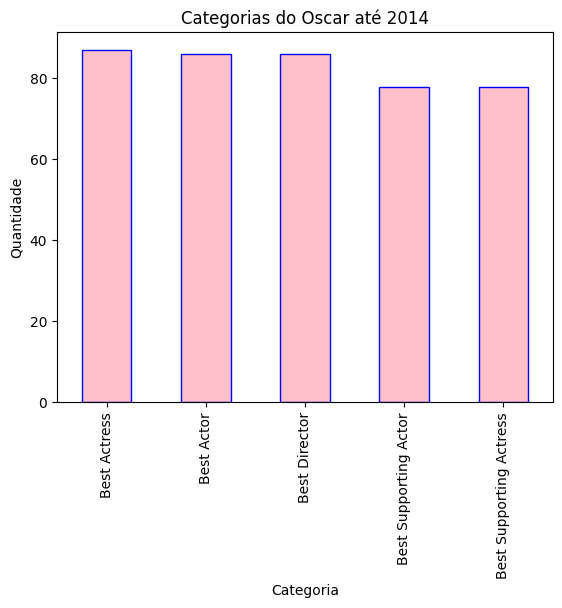

In [153]:
contagem_categoria = df['categoria'].value_counts()

# criação do gráfico

contagem_categoria.plot(kind="bar", edgecolor="blue", color="pink")

# configurações
plt.xlabel("Categoria")
plt.ylabel("Quantidade")
plt.title("Categorias do Oscar até 2014")
plt.legend
plt.show()

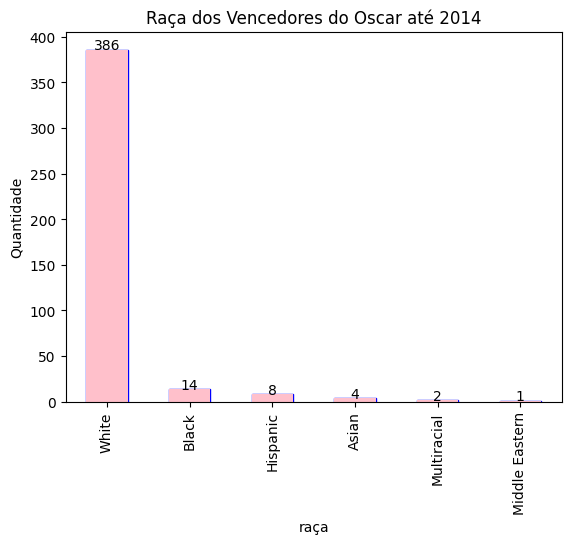

In [154]:
# contando o número de pessoas brancas

contagem_brancos = df['raça'].value_counts()

# criação do gráfico

contagem_brancos.plot(kind="bar", edgecolor="blue", color="pink")

# configurações
plt.xlabel("Raça do Ator/Atriz")
plt.ylabel("Quantidade")
plt.title("Raça dos Vencedores do Oscar até 2014")
plt.legend

# cores para barras
cores = ['pink']

#criando o grafico
barras = contagem_brancos.plot.bar(color=cores)

for i, v in enumerate(contagem_brancos):
    barras.text(i, v + 0.03, f'{v}', color='black', ha='center')
    
plt.show()

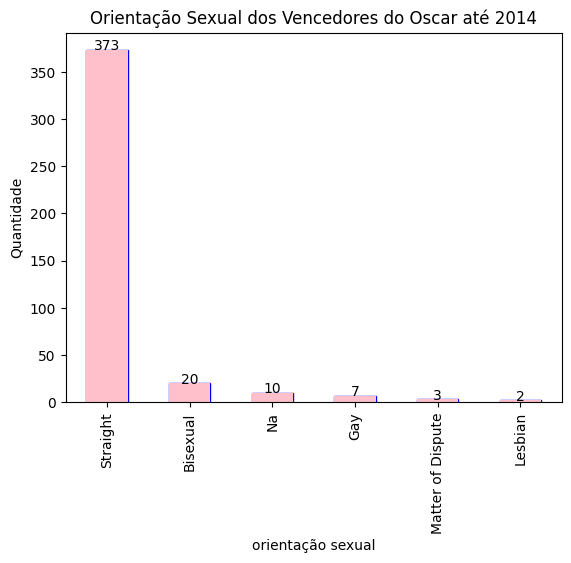

In [155]:
# contando o número de pessoas hétero

contagem_heteros = df['orientação sexual'].value_counts()

# criação do gráfico

contagem_heteros.plot(kind="bar", edgecolor="blue", color="pink")

# configurações
plt.xlabel("Orientação sexual do Ator/Atriz")
plt.ylabel("Quantidade")
plt.title("Orientação Sexual dos Vencedores do Oscar até 2014")
plt.legend

# cores para barras
cores = ['pink']

#criando o grafico
barras = contagem_heteros.plot.bar(color=cores)

for i, v in enumerate(contagem_heteros):
    barras.text(i, v + 0.03, f'{v}', color='black', ha='center')
    
plt.show()
plt.show()

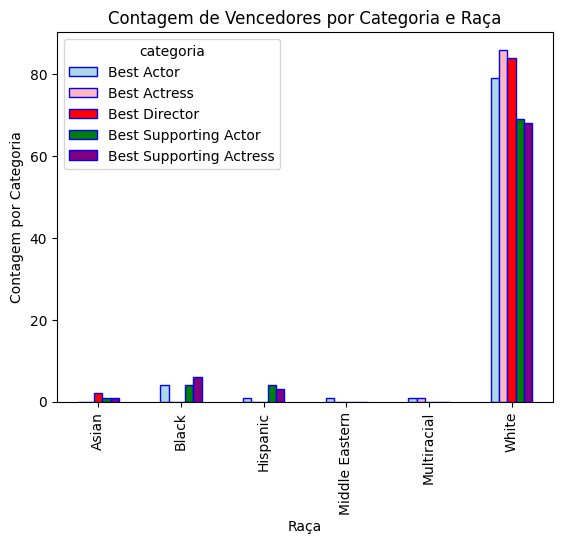

In [156]:
taxa_sob_raca = df.groupby('raça')['categoria'].value_counts().unstack(fill_value=0)
cores = ["lightblue", "lightpink", "red", "green", "purple"]
barras = taxa_sob_raca.plot.bar(edgecolor="blue", color=cores)

plt.xlabel("Raça")
plt.ylabel("Contagem por Categoria")
plt.title("Contagem de Vencedores por Categoria e Raça")
plt.show()


In [166]:
# Criando a nova coluna 'Pessoas Brancas'
df['Pessoas Brancas'] = df['raça'].apply(lambda x: 1 if x == "White" else 0)
df.head(50)

,nome,ano de nascimento,local de nascimento,raça,orientação sexual,ano da edição,categoria,filme,Pessoas Brancas,Vencedores
0,Marie Dressler,1868,"Cobourg, Ontario, Canada",White,Straight,1931,Best Actress,Min and Bill,1,1
1,George Arliss,1868,"London, England",White,Straight,1930,Best Actor,Desraeli,1,1
2,Edmund Gwenn,1875,"Vale of Glamorgan, Wales",White,Na,1948,Best Supporting Actor,Miracle on 34th Street,1,1
3,Charles Coburn,1877,"Savannah, Ga",White,Straight,1944,Best Supporting Actor,The More the Merrier,1,1
4,Lionel Barrymore,1878,"Philadelphia, Pa",White,Straight,1931,Best Actor,A Free Soul,1,1
5,Jane Darwell,1879,"Palmyra, Mo",White,Straight,1941,Best Supporting Actress,The Grapes of Wrath,1,1
6,Ethel Barrymore,1879,"Philadelphia, Pa",White,Straight,1945,Best Supporting Actress,None but the Lonely Heart,1,1
7,Donald Crisp,1880,"London, England",White,Straight,1942,Best Supporting Actor,How Green Was My Valley,1,1
8,Victor McLaglen,1883,"Tunbridge Wells, Kent, England",White,Straight,1936,Best Actor,The Informer,1,1
9,Victor Fleming,1883,"Pasadena, Ca",White,Straight,1940,Best Director,Gone with the Wind,1,1


In [164]:
# Criando a nova coluna 'Vencedores'
df['Vencedores'] = 1
df.head(10)

,nome,ano de nascimento,local de nascimento,raça,orientação sexual,ano da edição,categoria,filme,Pessoas Brancas,Vencedores
0,Marie Dressler,1868,"Cobourg, Ontario, Canada",White,Straight,1931,Best Actress,Min and Bill,1,1
1,George Arliss,1868,"London, England",White,Straight,1930,Best Actor,Desraeli,1,1
2,Edmund Gwenn,1875,"Vale of Glamorgan, Wales",White,Na,1948,Best Supporting Actor,Miracle on 34th Street,1,1
3,Charles Coburn,1877,"Savannah, Ga",White,Straight,1944,Best Supporting Actor,The More the Merrier,1,1
4,Lionel Barrymore,1878,"Philadelphia, Pa",White,Straight,1931,Best Actor,A Free Soul,1,1
5,Jane Darwell,1879,"Palmyra, Mo",White,Straight,1941,Best Supporting Actress,The Grapes of Wrath,1,1
6,Ethel Barrymore,1879,"Philadelphia, Pa",White,Straight,1945,Best Supporting Actress,None but the Lonely Heart,1,1
7,Donald Crisp,1880,"London, England",White,Straight,1942,Best Supporting Actor,How Green Was My Valley,1,1
8,Victor McLaglen,1883,"Tunbridge Wells, Kent, England",White,Straight,1936,Best Actor,The Informer,1,1
9,Victor Fleming,1883,"Pasadena, Ca",White,Straight,1940,Best Director,Gone with the Wind,1,1


c:\Users\brend\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Teste T de Vencedores
Estatística T : nan
Valor P: nan


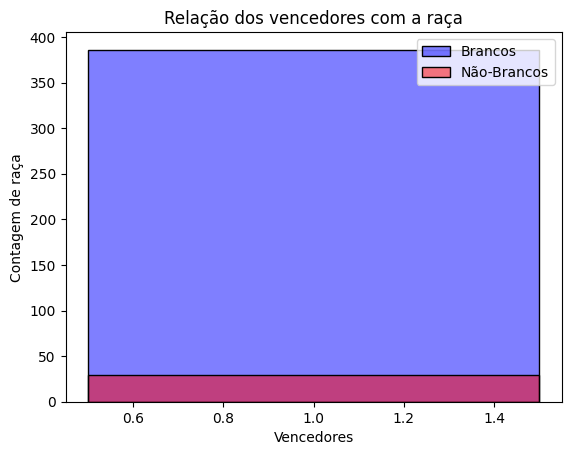

Não rejeitamos a hipótese nula


In [167]:
# Amostras
branco = df[df['Pessoas Brancas'] == 1]['Vencedores'].dropna()
naoBranco = df[df['Pessoas Brancas'] == 0]['Vencedores'].dropna()


# Teste t
estatistica_t, valor_p = ttest_ind(branco, naoBranco)

print("Teste T de Vencedores")
print(f"Estatística T : {estatistica_t}")
print(f"Valor P: {valor_p}")


#grafico
sns.histplot(branco, color= 'blue', label ='Brancos', kde=True)
sns.histplot(naoBranco, color = 'red', label = 'Não-Brancos', kde=True)

#rotulos
plt.legend()
plt.title("Relação dos vencedores com a raça")
plt.xlabel("Vencedores")
plt.ylabel("Contagem de raça")
plt.show()

#interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")